In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
%matplotlib inline

plt.style.use('seaborn-colorblind')
bboxprops = {'facecolor':'white', 'pad':0.5, 'boxstyle':'round', 'edgecolor':'lightgrey', 'alpha':0.7}

In [2]:
## Read in Excel files of data and question labels
XLS = pd.ExcelFile('../../ComputationSurveyData/LabeledComputationDataColumnRenamed.xlsx')
XLS2 = pd.ExcelFile('../../ComputationSurveyData/Questions.xlsx')

## Parse the appropriate sheets into dataframes
df = XLS.parse('LabeledComputationData')
questions = XLS2.parse('Sheet1')

In [9]:
def EvaluateQuestionSupport(inQuestion,
                     outQuestion,
                     supportStrings = ['Very strongly supported',
                                       'Strongly supported',
                                       'Somewhat supported',
                                       'Not supported',
                                       'I dont know']):
    
    N = len(supportStrings)

    counts = 0
    supportList = []
    NteachComp = []
    NnoTeachComp = []
    PteachComp = []
    PnoTeachComp = []

    for supportString in supportStrings:

        supportList.append(df[inQuestion].loc[df[inQuestion] == supportString].shape[0])

        indexFrame = df[inQuestion].loc[df[inQuestion] == supportString]
        indexFrame = indexFrame.reset_index()

        counts = df[outQuestion][indexFrame['index']].value_counts()

        NteachComp.append(counts[1])
        NnoTeachComp.append(counts[0])
        PteachComp.append(counts[1]/(counts[0]+counts[1])*100)
        PnoTeachComp.append(counts[0]/(counts[0]+counts[1])*100)
    
    return supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp

def GraphSupport(supportList, 
                 NteachComp, 
                 NnoTeachComp, 
                 PteachComp, 
                 PnoTeachComp, 
                 xStrings = ['Very strongly\nsupported',
                             'Strongly\nsupported',
                             'Somewhat\nsupported',
                             'Not\nsupported',
                             'I don\'t\nknow'],
                graphTitle='None'):
    
    N = len(xStrings)
    fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
    ax1 = fig1.add_subplot(111)

    for i in np.arange(0,N):
    
        plt.bar(i,supportList[i]/sum(supportList)*100)

    plt.ylabel('% of Respondents')
    plt.xticks(np.arange(0,N),
               xStrings,
               rotation=45);

    plt.axis([-.5,N-0.5,0,50]);
    plt.title(graphTitle)

    N1string = 'N = ' + str(sum(supportList));
    ax1.text(0, 42, N1string, bbox = bboxprops)

    fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
    ax2 = fig2.add_subplot(111)

    ind = np.arange(0,N)

    p1 = plt.bar(ind, PteachComp)
    p2 = plt.bar(ind, PnoTeachComp, bottom=PteachComp)
    plt.ylabel('% of Respondents')
    plt.xticks(np.arange(0,N),
               xStrings,
               rotation=45);

    plt.legend(['Yes','No'],loc=1)
    plt.title(graphTitle)
    plt.axis([-.5,N-0.5,0,100]);
    
    for i in np.arange(0,N):
        ax2.text(i-0.1, 20, 'N=' + str(NteachComp[i]+NnoTeachComp[i]), 
                 bbox = bboxprops, fontsize='smaller',rotation=90)

def XSquareTest(NteachComp,NnoTeachComp,alpha=0.05):
    
    obs = [NteachComp,NnoTeachComp]
    g, p, dof, expctd = chi2_contingency(obs)

    if p < alpha:
        print('There is an association between the variables (Xsq: ', str(g), ', p: ', str(p), ')')
    else:
        print('There is NO association between the variables (Xsq: ', str(g), ', and p: ', str(p), ')')

There is NO association between the variables (Xsq:  9.38524811517 , and p:  0.0521593018775 )


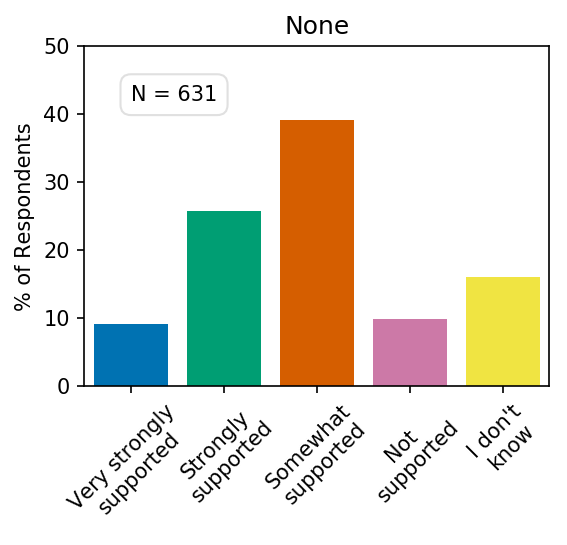

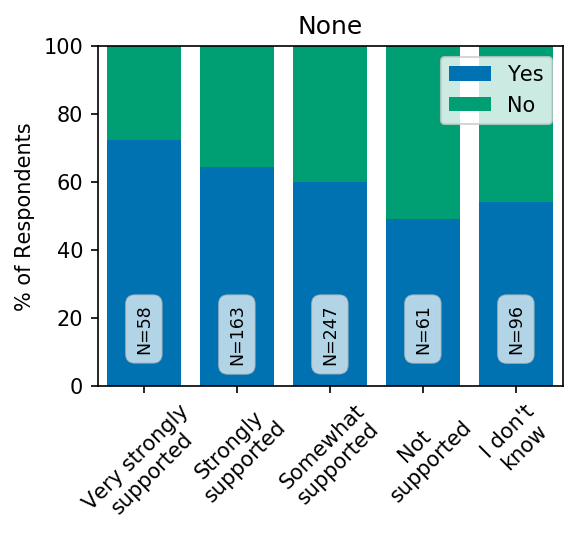

In [12]:
supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp = EvaluateQuestionSupport('Q62','Q8')
GraphSupport(supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp)
XSquareTest(NteachComp,NnoTeachComp,alpha=0.05)

There is NO association between the variables (Xsq:  9.38524811517 , and p:  0.0521593018775 )
There is an association between the variables (Xsq:  14.6880408725 , p:  0.00539396108203 )
There is an association between the variables (Xsq:  20.7155300279 , p:  0.00036055596819 )
There is an association between the variables (Xsq:  44.6583141419 , p:  4.68240899818e-09 )
There is an association between the variables (Xsq:  10.4903928966 , p:  0.0329295829199 )
There is an association between the variables (Xsq:  37.1002956734 , p:  1.71760462901e-07 )


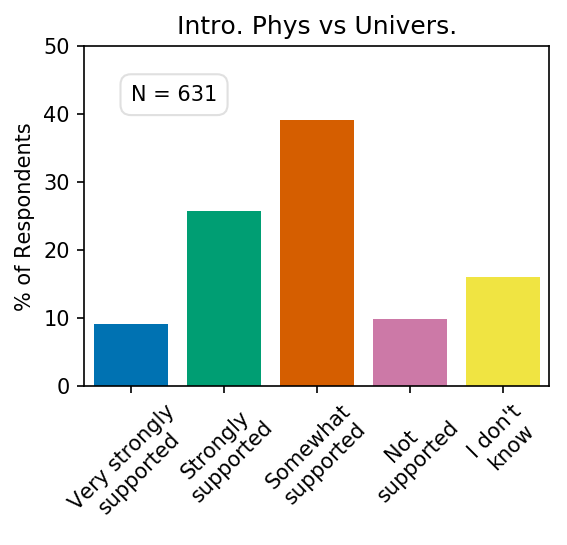

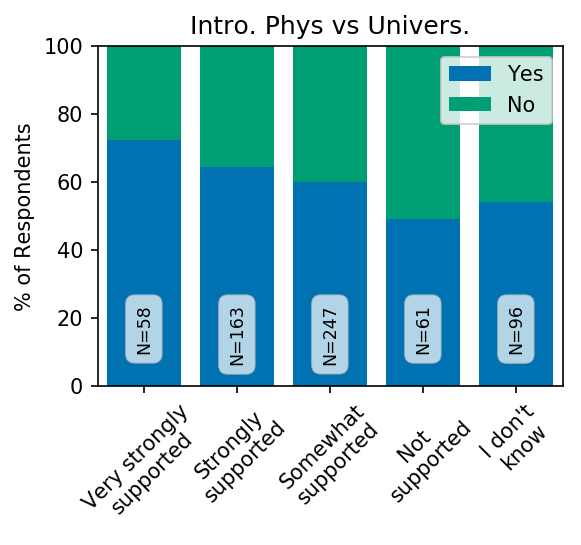

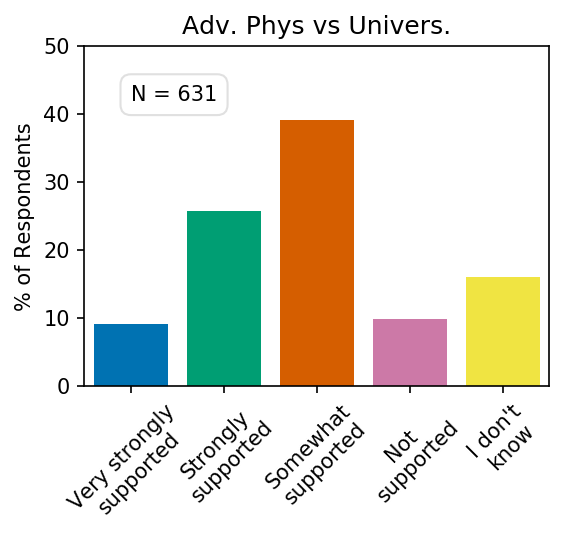

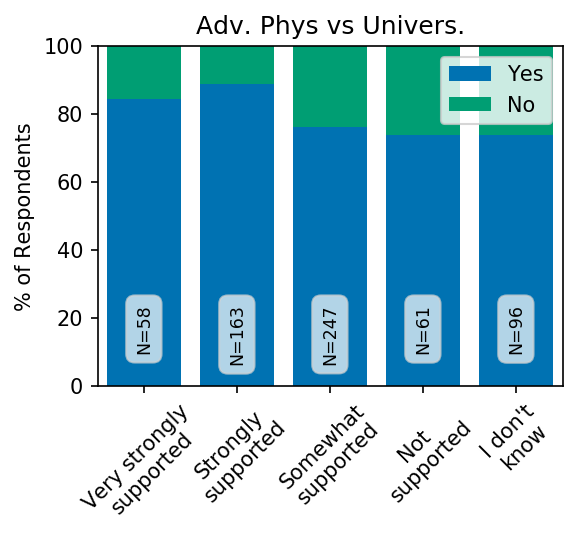

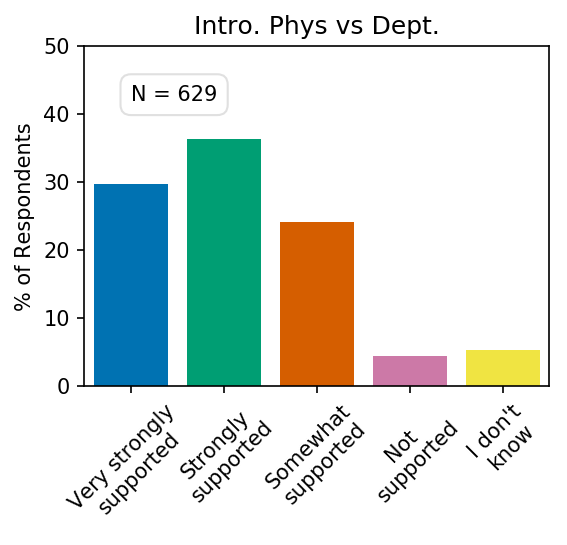

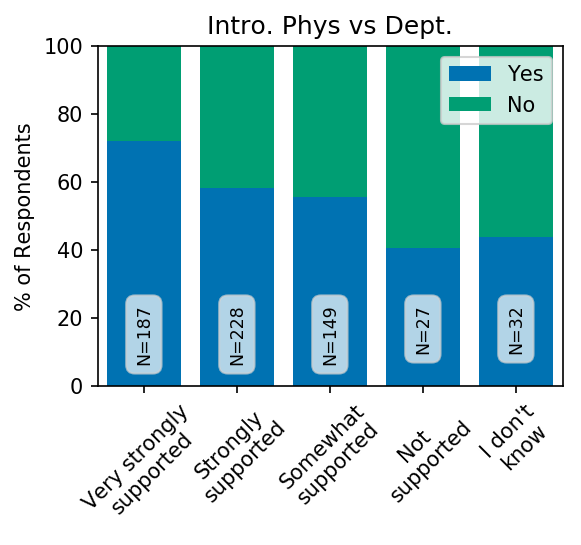

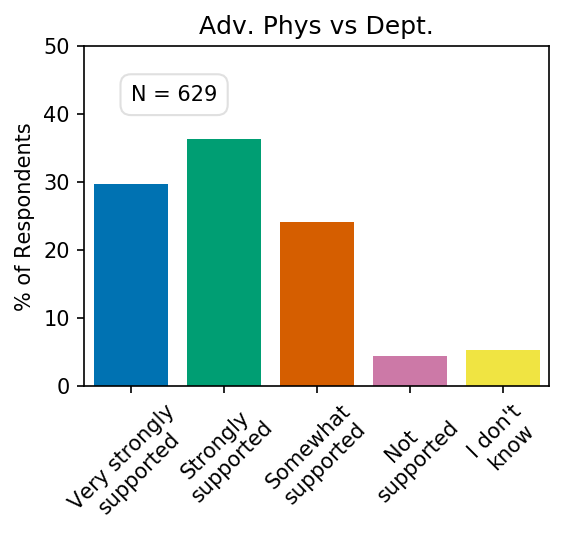

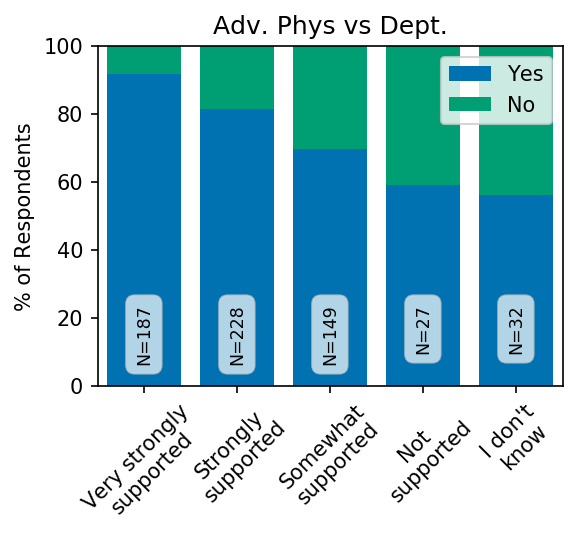

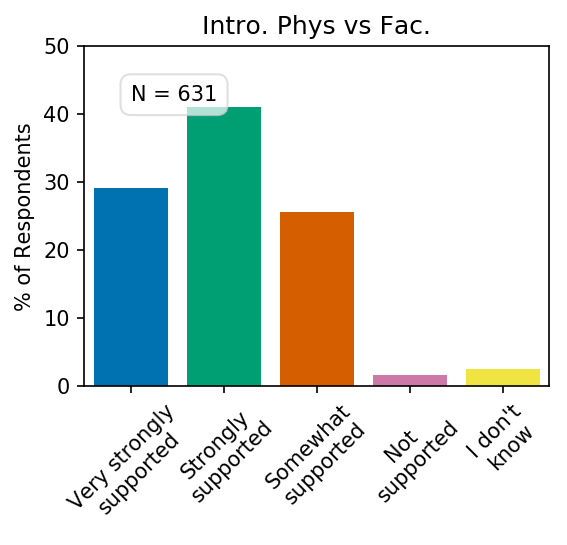

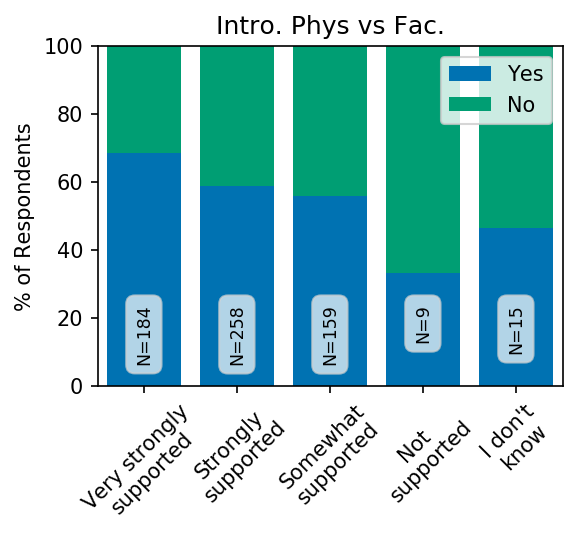

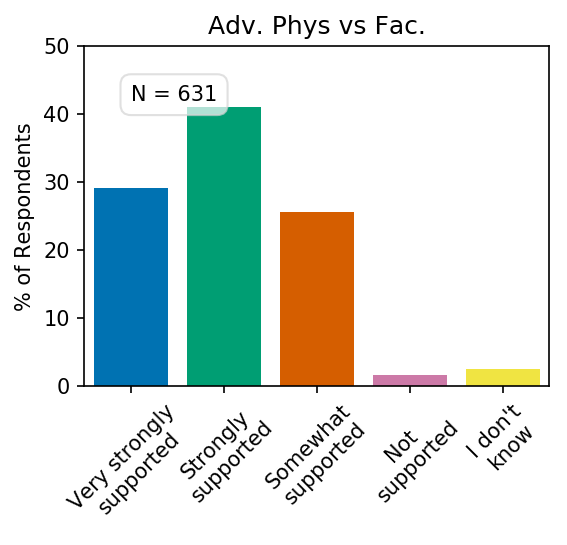

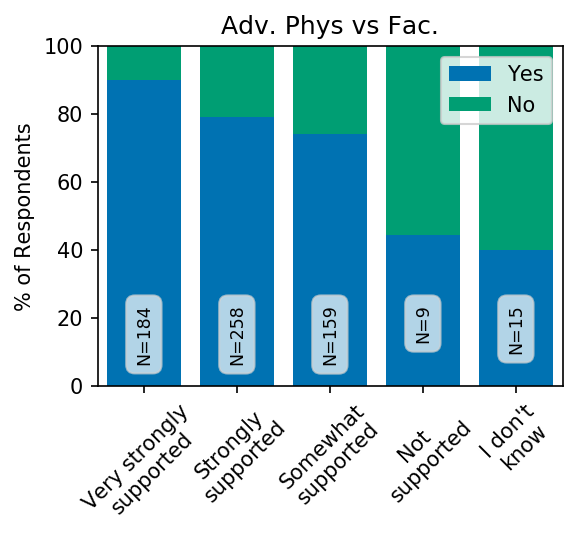

In [26]:
inQuestions = ['Q62','Q63','Q64']
outQuestions = ['Q8','Q11']
import itertools
combos = list(itertools.product(inQuestions, outQuestions))
titles = ['Intro. Phys vs Univers.',
         'Adv. Phys vs Univers.',
         'Intro. Phys vs Dept.',
         'Adv. Phys vs Dept.',
         'Intro. Phys vs Fac.',
         'Adv. Phys vs Fac.']

i = 0
for combo in combos:
    
    supportList = []
    NteachComp  = []
    NnoTeachComp  = []
    PteachComp  = []
    PnoTeachComp = []
    
    supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp = EvaluateQuestionSupport(combo[0],combo[1])
    GraphSupport(supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp,graphTitle=titles[i])
    XSquareTest(NteachComp,NnoTeachComp,alpha=0.05)
    i+=1

In [20]:
print(combos)

[('Q62', 'Q8'), ('Q62', 'Q11'), ('Q63', 'Q8'), ('Q63', 'Q11'), ('Q64', 'Q8'), ('Q64', 'Q11')]


There is an association between the variables (Xsq:  14.6880408725 , p:  0.00539396108203 )


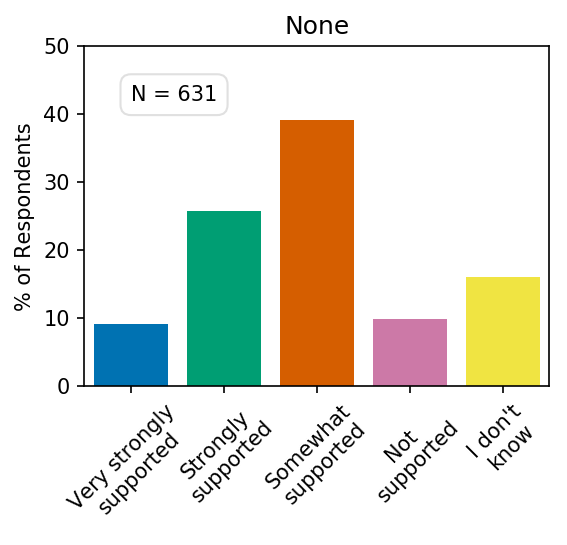

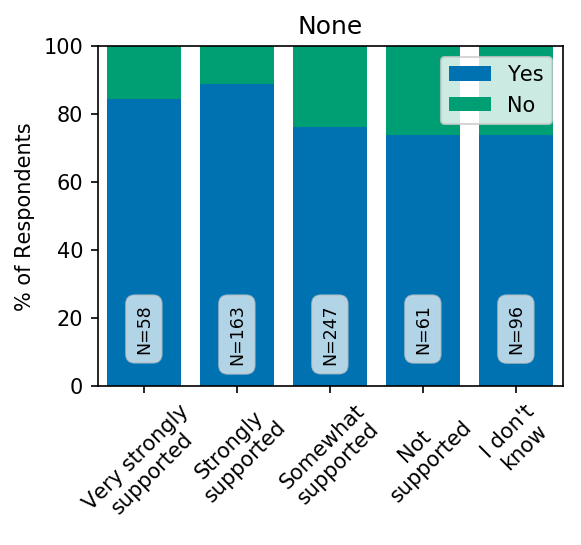

In [13]:
supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp = EvaluateQuestionSupport('Q62','Q11')
GraphSupport(supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp)
XSquareTest(NteachComp,NnoTeachComp,alpha=0.05)

There is an association between the variables (Xsq:  20.7155300279 , p:  0.00036055596819 )


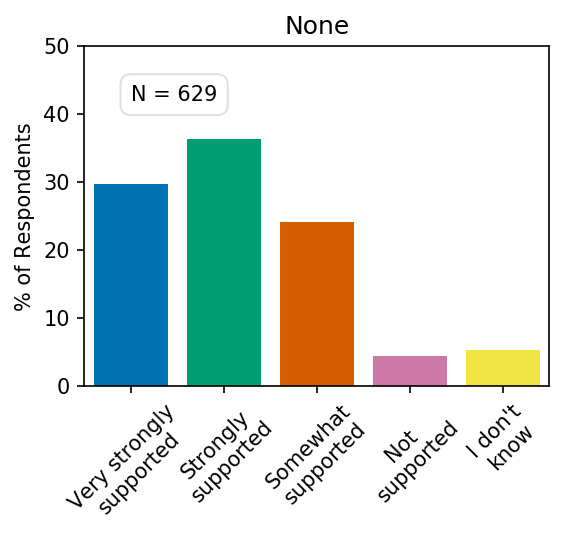

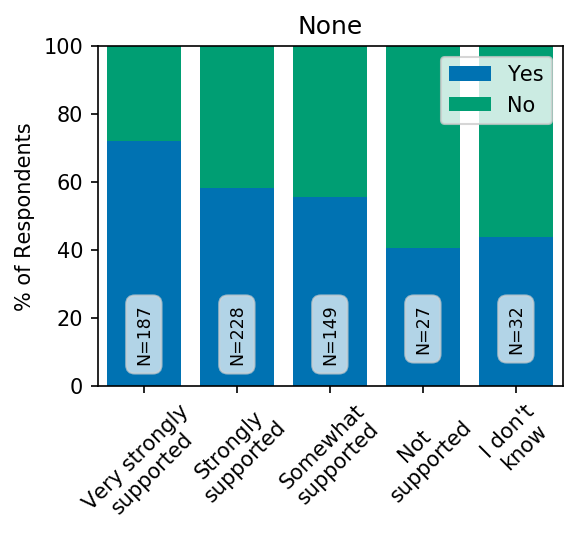

In [14]:
supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp = EvaluateQuestionSupport('Q63','Q8')
GraphSupport(supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp)
XSquareTest(NteachComp,NnoTeachComp,alpha=0.05)

There is an association between the variables (Xsq:  44.6583141419 , p:  4.68240899818e-09 )


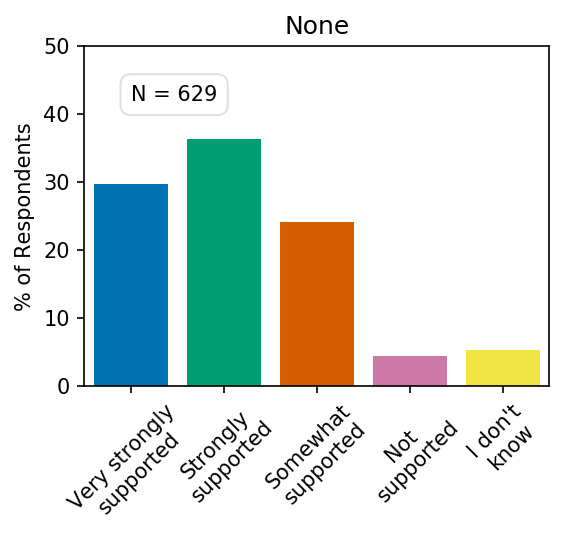

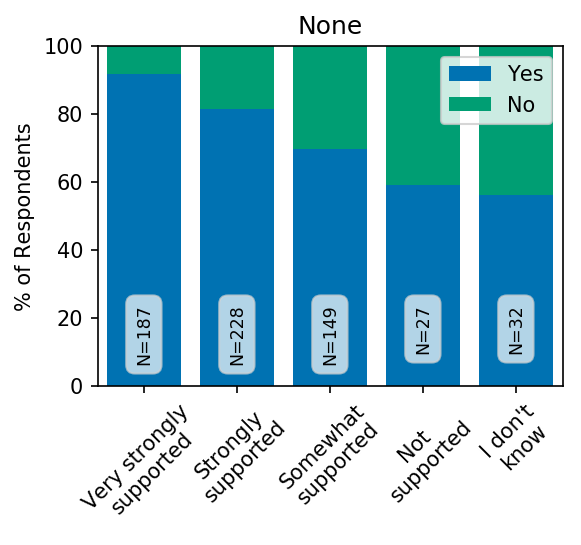

In [15]:
supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp = EvaluateQuestionSupport('Q63','Q11')
GraphSupport(supportList, NteachComp, NnoTeachComp, PteachComp, PnoTeachComp)
XSquareTest(NteachComp,NnoTeachComp,alpha=0.05)

There is an association between the variables (Xsq:  14.6880408725 , p:  0.00539396108203 )


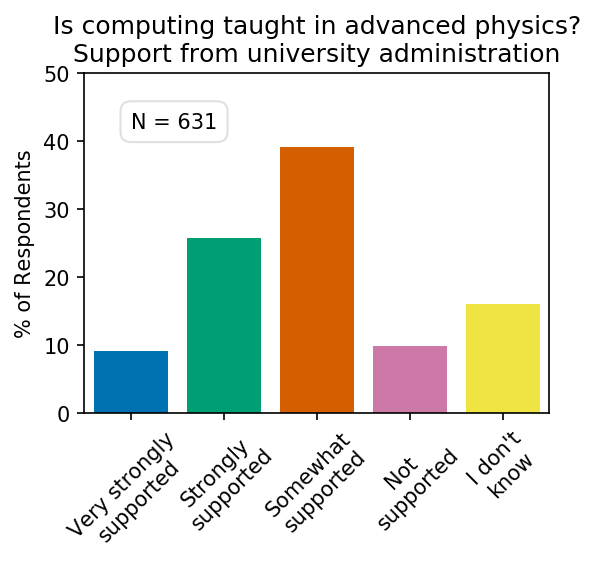

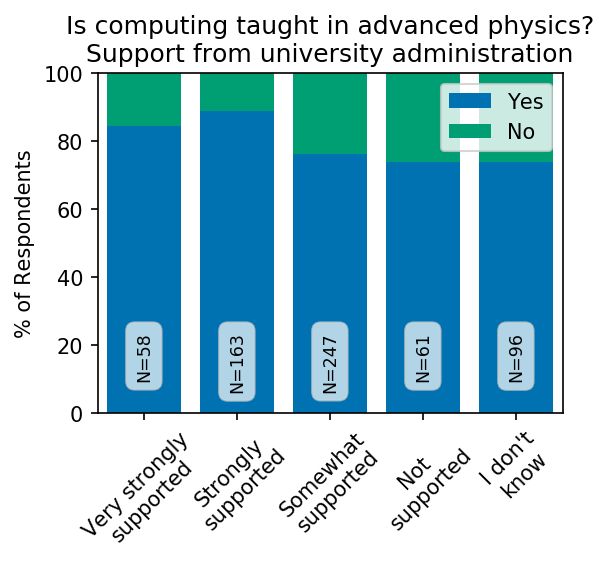

In [4]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']

inQuestion = 'Q62'
outQuestion = 'Q11'
N = len(supportStrings)

supportList = []

NteachComp = []
NnoTeachComp = []
PteachComp = []
PnoTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[inQuestion].loc[df[inQuestion] == supportString].shape[0])
    
    indexFrame = df[inQuestion].loc[df[inQuestion] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    NteachComp.append(counts[1])
    NnoTeachComp.append(counts[0])
    PteachComp.append(counts[1]/(counts[0]+counts[1])*100)
    PnoTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,N):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,N),
           xStrings,
           rotation=45);

plt.axis([-.5,N-0.5,0,50]);
plt.title('Is computing taught in advanced physics?\nSupport from university administration')

N1string = 'N = ' + str(sum(supportList));
ax1.text(0, 42, N1string, bbox = bboxprops)

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,N)

p1 = plt.bar(ind, PteachComp)
p2 = plt.bar(ind, PnoTeachComp, bottom=PteachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,N),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'],loc=1)
plt.title('Is computing taught in advanced physics?\nSupport from university administration')
plt.axis([-.5,N-0.5,0,100]);

for i in np.arange(0,N):
    ax2.text(i-0.1, 20, 'N=' + str(NteachComp[i]+NnoTeachComp[i]), 
             bbox = bboxprops, fontsize='smaller',rotation=90)
    
obs = [NteachComp,NnoTeachComp]
g, p, dof, expctd = chi2_contingency(obs)

if p < 0.05:
    print('There is an association between the variables (Xsq: ', str(g), ', p: ', str(p), ')')
else:
    print('There is NO association between the variables (Xsq: ', str(g), ', and p: ', str(p), ')')

In [ ]:
obs = [NteachComp,NnoTeachComp]
#obs = np.array(obs)
g, p, dof, expctd = chi2_contingency(obs)


print(g)
print(p)

In [ ]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q62'
outQuestion = 'Q8'
supportList = []

NteachComp = []
NnoTeachComp = []
PteachComp = []
PnoTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    NteachComp.append(counts[1])
    NnoTeachComp.append(counts[0])
    PteachComp.append(counts[1]/(counts[0]+counts[1])*100)
    PnoTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in intro. physics?\nSupport from university administration')

N1string = 'N = ' + str(sum(supportList));
ax1.text(0, 42, N1string, bbox = bboxprops)

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, PteachComp)
p2 = plt.bar(ind, PnoTeachComp, bottom=PteachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'],loc=2)
plt.title('Is computing taught in intro. physics?\nSupport from university administration')
plt.axis([-.5,4.5,0,100]);

for i in np.arange(0,5):
    ax2.text(i-0.1, 20, 'N=' + str(NteachComp[i]+NnoTeachComp[i]), 
             bbox = bboxprops, fontsize='smaller',rotation=90)

In [ ]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q63'
outQuestion = 'Q8'
supportList = []

NteachComp = []
NnoTeachComp = []
PteachComp = []
PnoTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    NteachComp.append(counts[1])
    NnoTeachComp.append(counts[0])
    PteachComp.append(counts[1]/(counts[0]+counts[1])*100)
    PnoTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in intro. physics?\nSupport from dept. administration')

N1string = 'N = ' + str(sum(supportList));
ax1.text(0, 42, N1string, bbox = bboxprops)

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, PteachComp)
p2 = plt.bar(ind, PnoTeachComp, bottom=PteachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'],loc=2)
plt.title('Is computing taught in intro. physics?\nSupport from dept. administration')
plt.axis([-.5,4.5,0,100]);

for i in np.arange(0,5):
    ax2.text(i-0.1, 20, 'N=' + str(NteachComp[i]+NnoTeachComp[i]), 
             bbox = bboxprops, fontsize='smaller',rotation=90)

In [ ]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q63'
outQuestion = 'Q11'
supportList = []

NteachComp = []
NnoTeachComp = []
PteachComp = []
PnoTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    NteachComp.append(counts[1])
    NnoTeachComp.append(counts[0])
    PteachComp.append(counts[1]/(counts[0]+counts[1])*100)
    PnoTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in advanced physics?\nSupport from dept. administration')

N1string = 'N = ' + str(sum(supportList));
ax1.text(0, 42, N1string, bbox = bboxprops)

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, PteachComp)
p2 = plt.bar(ind, PnoTeachComp, bottom=PteachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'],loc=1)
plt.title('Is computing taught in advanced physics?\nSupport from dept. administration')
plt.axis([-.5,4.5,0,100]);

for i in np.arange(0,5):
    ax2.text(i-0.1, 20, 'N=' + str(NteachComp[i]+NnoTeachComp[i]), 
             bbox = bboxprops, fontsize='smaller',rotation=90)

In [ ]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q64'
outQuestion = 'Q8'
supportList = []

NteachComp = []
NnoTeachComp = []
PteachComp = []
PnoTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    NteachComp.append(counts[1])
    NnoTeachComp.append(counts[0])
    PteachComp.append(counts[1]/(counts[0]+counts[1])*100)
    PnoTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in intro. physics?\nSupport from other faculty')

N1string = 'N = ' + str(sum(supportList));
ax1.text(0, 42, N1string, bbox = bboxprops)

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, PteachComp)
p2 = plt.bar(ind, PnoTeachComp, bottom=PteachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'],loc=2)
plt.title('Is computing taught in intro. physics?\nSupport from other faculty')
plt.axis([-.5,4.5,0,100]);

for i in np.arange(0,5):
    ax2.text(i-0.1, 20, 'N=' + str(NteachComp[i]+NnoTeachComp[i]), 
             bbox = bboxprops, fontsize='smaller',rotation=90)

In [ ]:
supportStrings = ['Very strongly supported','Strongly supported','Somewhat supported','Not supported','I dont know']
inQuestion = 'Q64'
outQuestion = 'Q11'
supportList = []

NteachComp = []
NnoTeachComp = []
PteachComp = []
PnoTeachComp = []

for supportString in supportStrings:
    
    supportList.append(df[question].loc[df[question] == supportString].shape[0])
    
    indexFrame = df[question].loc[df[question] == supportString]
    indexFrame = indexFrame.reset_index()

    counts = df[outQuestion][indexFrame['index']].value_counts()
    
    NteachComp.append(counts[1])
    NnoTeachComp.append(counts[0])
    PteachComp.append(counts[1]/(counts[0]+counts[1])*100)
    PnoTeachComp.append(counts[0]/(counts[0]+counts[1])*100)

fig1 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

xStrings = ['Very strongly\nsupported','Strongly\nsupported','Somewhat\nsupported','Not\nsupported','I don\'t\nknow']

for i in np.arange(0,5):
    
    plt.bar(i,supportList[i]/sum(supportList)*100)

plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);

plt.axis([-.5,4.5,0,50]);
plt.title('Is computing taught in advanced physics?\nSupport from other faculty')

N1string = 'N = ' + str(sum(supportList));
ax1.text(0, 42, N1string, bbox = bboxprops)

fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
ax2 = fig2.add_subplot(111)

ind = np.arange(0,5)

p1 = plt.bar(ind, PteachComp)
p2 = plt.bar(ind, PnoTeachComp, bottom=PteachComp)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0,5),
           xStrings,
           rotation=45);
plt.legend(['Yes','No'],loc=1)
plt.title('Is computing taught in advanced physics?\nSupport from other faculty')
plt.axis([-.5,4.5,0,100]);

for i in np.arange(0,5):
    ax2.text(i-0.1, 20, 'N=' + str(NteachComp[i]+NnoTeachComp[i]), 
             bbox = bboxprops, fontsize='smaller',rotation=90)